다음과 같이 Encoding 을 한다.

1. 우선 24비트 버퍼에 위쪽(MSB)부터 한 byte씩 3 byte의 문자를 집어넣는다.

2. 버퍼의 위쪽부터 6비트씩 잘라 그 값을 읽고, 각각의 값을 아래 [표-1] 의 문자로 Encoding 한다.


입력으로 Base64 Encoding 된 String 이 주어졌을 때, 해당 String 을 Decoding 하여, 원문을 출력하는 프로그램을 작성하시오.

[제약사항]
문자열의 길이는 항상 4의 배수로 주어진다.
그리고 문자열의 길이는 100000을 넘지 않는다.

[입력]
입력은 첫 줄에 총 테스트 케이스의 개수 T가 온다.
다음 줄부터 각 테스트 케이스가 주어진다.
테스트 케이스는 Encoding 된 상태로 주어지는 문자열이다.

[출력]
테스트 케이스 t에 대한 결과는 “#t”을 찍고, 한 칸 띄고, 정답을 출력한다.
(t는 테스트 케이스의 번호를 의미하며 1부터 시작한다.)

 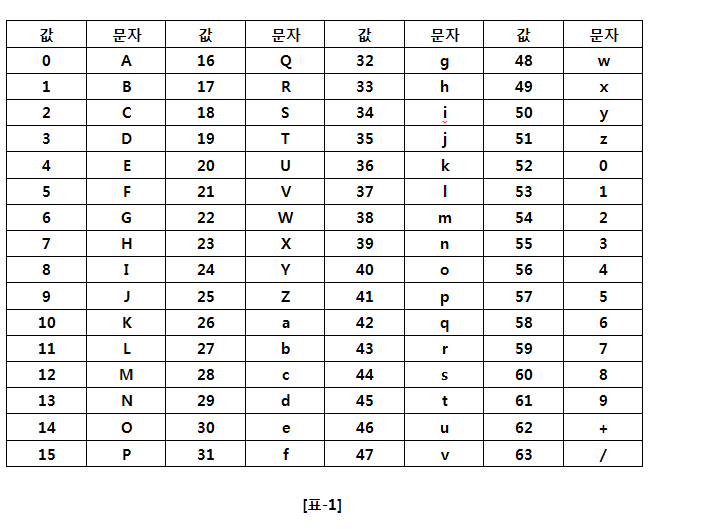
 
 문제 요약
1. 표1을 보고 입력받은 문자들을 각각 대응하는 숫자로 변경한다.
2. 각 숫자들을 6자리 이진수로 표현하고, 이 이진수들을 한 줄로 쭉 이어 붙인다.
3. 한 줄로 쭉 이어붙인 이진수들을 8자리씩 끊어서 십진수로 바꾼다.
4. 각각의 십진수를 아스키 코드로 변환한다.

```python

입력
10
TGlmZSBpdHNlbGYgaXMgYSBxdW90YXRpb24u
U3VzcGljaW9uIGZvbGxvd3MgY2xvc2Ugb24gbWlzdHJ1c3Qu
VG8gZG91YnQgaXMgc2FmZXIgdGhhbiB0byBiZSBzZWN1cmUu
T25seSB0aGUganVzdCBtYW4gZW5qb3lzIHBlYWNlIG9mIG1pbmQu
QSBmdWxsIGJlbGx5IGlzIHRoZSBtb3RoZXIgb2YgYWxsIGV2aWwu

출력
#1 Life itself is a quotation.
#2 Suspicion follows close on mistrust.
#3 To doubt is safer than to be secure.
#4 Only the just man enjoys peace of mind.
#5 A full belly is the mother of all evil.

```

In [ ]:
# import sys
# sys.stdin = open("input.txt", 'r')

In [ ]:
# 참고. 알파벳을 숫자로 변환 D1 SWACADEMY
T = input()
output_string =""
 
for char in T:
    # 대문자 알파벳의 순서를 구하기 위해 ASCII 코드 값을 활용
    # A의 ASCII 코드 값은 65, B는 66, ..., Z는 90
    # 따라서, 해당 알파벳의 ASCII 코드 값에서 64를 뺀 값이 알파벳의 순서와 동일
    order = ord(char) - 64
    output_string += str(order) + " "
 
output_string = output_string.strip() # 마지막 공백 제거
 
print(output_string)

In [ ]:
# 정답

T = int(input())
for test_case in range(1, T + 1):
    string = input()
    print('#%d' %test_case, end=' ')
    for i in range(0, len(string), 4):
        binary = ''
        for c in string[i:i+4]:
            tmp = 0
            if c.islower(): # 문자를 디코딩한 숫자를 6비트 2진수로 변환하기
                binary += '{0:0>6}'.format(format(ord(c) - 71, 'b'))  # 전체 너비가 6이 되고 빈칸은 0으로 채우며 우측 정렬하도록 포멧팅.
            elif c.isupper():
                binary += '{0:0>6}'.format(format(ord(c) - 65, 'b'))
            elif c.isdigit():
                binary += '{0:0>6}'.format(format(ord(c) + 4, 'b'))
            else:
                binary += '{0:0>6}'.format(format(ord(c)+ 19, 'b'))
        for c in range(0, 24, 8): # 24비트 숫자를 8비트씩 나눠 10진수로 변환하여 문자값으로 변화
            print(chr(int(binary[c:c + 8], 2)), end='')
    print()

ord(c) - 71은 해당 문자 c를 Base64에서 사용하는 숫자로 디코딩합니다. 
앞서 언급한대로 소문자의 경우 'a'부터 'z'까지의 ASCII 값에 -71을 해주어 Base64에서 사용하는 숫자로 변환합니다.
format(값, 'b' = binary) 값을 이진수로 변환하겠다는 뜻
'형식지정자'format (  )  -->  전체 너비가 6이 되고 빈칸은 0으로 채우며 우측 정렬하도록 포멧팅.

ord(c) - 71 이 소문자고, ord(c) -65 가 대문자, +4 가 digit 인 이유는 걍 ASCII 를 BASE64로 변환하면 그렇게 됨.
ord(문자) --> 하나의 문자를 인자로 받고 해당 문자에 해당하는 유니코드 정수를 반환
chr(정수) --> 하나의 숫자를 받고 숫자에 해당하는 유니코드 문자를 반환